<a href="https://colab.research.google.com/github/Julioore/TFM/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valoración de opciones financieras
* Método Binomial
* Método de Black-Scholes
* Convergencia entre ambos métodos
* Gráfico de convergencia

In [ ]:
import numpy as np                              # importamos las librerías
from scipy.stats import binom
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt

# Fórmula para método de valoración opciones europeas mediante árbol binomial

def prima(tipo, spot, strik, anyos, volatilidad, n, tInt):
    r = np.log(1+tInt)                          # r es el tanto instantáneo
    deltaT = anyos / n
    u = np.exp(volatilidad * np.sqrt(deltaT))
    d = 1/u
    p = (np.exp(r*deltaT)-d) / (u-d)
    Sn = [0]*(n+1)                              # Sn es la lista de precios del activo subyacene a fecha de vto.
    payoff = [0]*(n+1)                          # inicilizamos a cero la lista del payoff
    prima = 0
    for i in range(n+1):
        Sn[i] = spot * u**(n-i) * d**i
        if tipo.lower() == 'call':
            payoff[i] = max(0, Sn[i] - strik)
        if tipo.lower() == 'put':
            payoff[i] = max(0, strik - Sn[i])
        prima += payoff[i] * binom.pmf(n-i, n, p)
    prima *= np.exp(-r * anyos)                 # descontamos a valor actual, hasta t=0
    return prima

# Fórmula para método de Black-Scholes

def primaBS(tipo, spot, strik, anyos, volatilidad, tInt):
    r = np.log(1+tInt)                          # r es el tanto instantáneo
    d1 = (np.log(spot/strik) + (r + 0.5 * volatilidad**2) * anyos) / (volatilidad * np.sqrt(anyos))
    d2 = d1 - volatilidad * np.sqrt(anyos)
    if tipo.lower() == 'call':
      primaBS = spot * norm.cdf(d1) - strik * np.exp(-r * anyos) * norm.cdf(d2)
    if tipo.lower() == 'put':
      primaBS = strik * np.exp(-r * anyos) * norm.cdf(-d2) - spot * norm.cdf(-d1)
    return primaBS

# Representamos gráficamente la valoración por el método binomial
# Cuando el número de pasos del método binomial tiende a infinito el 
# valor teórico obtenido coincide con el que proporciona el método de Black-Scholes

m = 200                                   # Calcularemos el arbol desde 1 hasta m pasos
evolucion = [0]*(m)
for j in range(m):
    evolucion[j] = prima('call', 100, 110, 2, 0.2, j+1, 0.07)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
last = 1
bound = m
ax.plot(evolucion)
fig.savefig('graph.png')
print('Prima(1)=', evolucion[0])
print('Prima(2)=', evolucion[1])
print('Prima(3)=', evolucion[2])
print('Prima(4)=', evolucion[3])
print('Prima('+str(m)+')=', evolucion[m-1])
print()
BS = primaBS('call', 100, 110, 2, 0.2, 0.07)
print('Prima Black-Scholes=', BS)
print()

In [ ]:
# Analizamos la convergencia entre ambos métodos
# y representamos el gráfico de convergencia
# Se comprueba que cuando el número de pasos del método binomial tiende a infinito 
# la diferencia entre el valor teórico obtenido y el valor que proporciona el 
# método de Black-Scholes tiende a 0.


m = 200                                   
diferencia = [0]*(m)
for j in range(m):
    diferencia[j] = evolucion[j] - BS
   # print(j+1, evolucion[j], BS, diferencia[j])


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
last = 1
bound = m
ax.plot(diferencia)
fig.savefig('graph.png')

# Diseño de estrategias con opciones financieras



Número de contratos opción A: 1
Número opciones A = 1
Operación con opción A: Compra o Venta. Venta
Tipo de operación de la opción A: Venta
Tipo de opción: Call o Put. Call
Tipo de la opción A: CALL
Precio de ejercicio opción A: 90
Precio de ejercicio opción A= 90.0
Prima de la opción A: 8
Prima de la opción A= 8.0

Número de contratos opción B: 1
Número opciones B = 1
Operación con opción B: Compra o Venta. Compra
Tipo de operación de la opción B: Compra
Tipo de opción: Call o Put. Call
Tipo de la opción B: CALL
Precio de ejercicio opción B: 100
Precio de ejercicio opción B= 100.0
Prima de la opción B: 6
Prima de la opción B= 6.0

Número de contratos opción C: 1
Número opciones C = 1
Operación con opción C: Compra o Venta. Compra
Tipo de operación de la opción C: Compra
Tipo de opción: Call o Put. Call
Tipo de la opción C: CALL
Precio de ejercicio opción C: 120
Precio de ejercicio opción C= 120.0
Prima de la opción C: 6
Prima de la opción C= 6.0

Número de contratos opción D: 1
Número

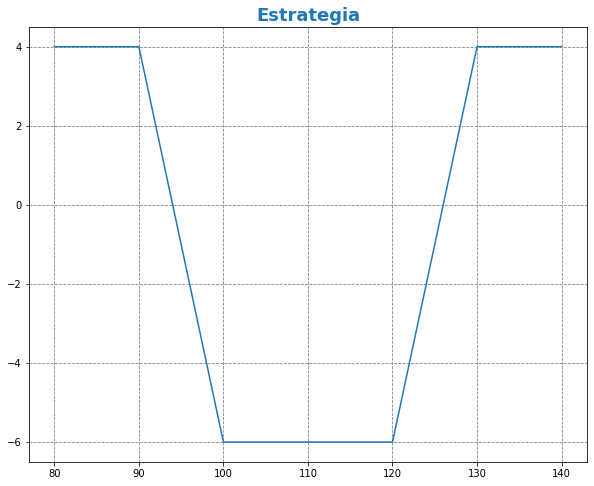

In [19]:
import matplotlib as mpl                                    # importamos las librerías
import matplotlib.pyplot as plt

# Datos de entrada para la opción A
numA = int(input('Número de contratos opción A: ') or 1)    # número de contratos de la opción A
print('Número opciones A =', numA)                                                      
operacionA = input('Operación con opción A: Compra o Venta. ') or 'Compra'   # tipo de operación: compra o venta
if operacionA.lower() == 'compra':
    print('Tipo de operación de la opción A: Compra')
else:
    print('Tipo de operación de la opción A: Venta')                                                    
tipoA = input('Tipo de opción: Call o Put. ') or 'Call'       # tipo de opción: CALL o PUT
if tipoA.lower() == 'call':
    print('Tipo de la opción A: CALL')
else:
    print('Tipo de la opción A: PUT')                     
strikA = float(input('Precio de ejercicio opción A: ') or 90) # precio de ejercicio de la opción A
print('Precio de ejercicio opción A=', strikA)                                                        
primaA = float(input('Prima de la opción A: ') or 8)          # importe de la prima de la opción A
print('Prima de la opción A=', primaA)
print()                                                        

# Datos de entrada para la opción B                           # idem para opción B
numB = int(input('Número de contratos opción B: ') or 1)    
print('Número opciones B =', numB)                                                          
operacionB = input('Operación con opción B: Compra o Venta. ') or 'Compra'   
if operacionB.lower() == 'compra':
    print('Tipo de operación de la opción B: Compra')
else:
    print('Tipo de operación de la opción B: Venta') 
tipoB = input('Tipo de opción: Call o Put. ') or 'Call'
if tipoB.lower() == 'call':
    print('Tipo de la opción B: CALL')
else:
    print('Tipo de la opción B: PUT')
strikB = float(input('Precio de ejercicio opción B: ') or 100)  
print('Precio de ejercicio opción B=', strikB) 
primaB = float(input('Prima de la opción B: ') or 6)          
print('Prima de la opción B=', primaB)
print()

# Datos de entrada para la opción C                            # idem para opción C
numC = int(input('Número de contratos opción C: ') or 1)    
print('Número opciones C =', numC)                                                                     
operacionC = input('Operación con opción C: Compra o Venta. ') or 'Compra'   
if operacionC.lower() == 'compra':
    print('Tipo de operación de la opción C: Compra')
else:
    print('Tipo de operación de la opción C: Venta') 
tipoC = input('Tipo de opción: Call o Put. ') or 'Call'
if tipoC.lower() == 'call':
    print('Tipo de la opción C: CALL')
else:
    print('Tipo de la opción C: PUT')
strikC = float(input('Precio de ejercicio opción C: ') or 120)  
print('Precio de ejercicio opción C=', strikC)
primaC = float(input('Prima de la opción C: ') or 6)          
print('Prima de la opción C=', primaC)
print()

# Datos de entrada para la opción D                            # idem para opción D
numD = int(input('Número de contratos opción D: ') or 1)    
print('Número opciones D =', numD)                              
operacionD = input('Operación con opción D: Compra o Venta. ') or 'Compra'   
if operacionD.lower() == 'compra':
    print('Tipo de operación de la opción D: Compra')
else:
    print('Tipo de operación de la opción D: Venta') 
tipoD = input('Tipo de opción: Call o Put. ') or 'Call'
if tipoD.lower() == 'call':
    print('Tipo de la opción D: CALL')
else:
    print('Tipo de la opción D: PUT')
strikD = float(input('Precio de ejercicio opción D: ') or 130)  
print('Precio de ejercicio opción D=', strikD) 
primaD = float(input('Prima de la opción D: ') or 8)          
print('Prima de la opción D=', primaD)
print()

# Evolución de precios del activo subyacente
start=80
stop=141

subyacente = list(range(start,stop))
# print(subyacente)

# Evolución precios subyacente para opción A
subyacenteA=[0]*(stop-start)
if tipoA.lower()=='call':
  for i in range(stop-start):
    subyacenteA[i] = subyacente[i]
else:
  for i in range(stop-start):
    subyacenteA[i] = strikA - subyacente[i] + strikA
# print(subyacenteA)

# Evolución payoff opción A
payoffA=[0]*(stop-start)
if operacionA.lower()=='compra':
  for i in range(stop-start):
    if subyacenteA[i] <= strikA:
      payoffA[i] = -primaA * numA
    else:
      payoffA[i] = (subyacenteA[i] - strikA - primaA) * numA
else:
  for i in range(stop-start):
    if subyacenteA[i] <= strikA:
      payoffA[i] = (-primaA * numA) * (-1)
    else:
      payoffA[i] = (subyacenteA[i] - strikA - primaA) * numA * (-1)
# print(payoffA)

# Evolución precios subyacente para opción B
subyacenteB=[0]*(stop-start)
if tipoB.lower()=='call':
  for i in range(stop-start):
    subyacenteB[i] = subyacente[i]
else:
  for i in range(stop-start):
    subyacenteB[i] = strikB - subyacente[i] + strikB
# print(subyacenteB)

# Evolución payoff opción B
payoffB=[0]*(stop-start)
if operacionB.lower()=='compra':
  for i in range(stop-start):
    if subyacenteB[i] <= strikB:
      payoffB[i] = -primaB * numB
    else:
      payoffB[i] = (subyacenteB[i] - strikB - primaB) * numB
else:
  for i in range(stop-start):
    if subyacenteB[i] <= strikB:
      payoffB[i] = (-primaB * numB) * (-1)
    else:
      payoffB[i] = (subyacenteB[i] - strikB - primaB) * numB * (-1)
# print(payoffB)

# Evolución precios subyacente para opción C
subyacenteC=[0]*(stop-start)
if tipoC.lower()=='call':
  for i in range(stop-start):
    subyacenteC[i] = subyacente[i]
else:
  for i in range(stop-start):
    subyacenteC[i] = strikC - subyacente[i] + strikC
# print(subyacenteC)

# Evolución payoff opción C
payoffC=[0]*(stop-start)
if operacionC.lower()=='compra':
  for i in range(stop-start):
    if subyacenteC[i] <= strikC:
      payoffC[i] = -primaC * numC
    else:
      payoffC[i] = (subyacenteC[i] - strikC - primaC) * numC
else:
  for i in range(stop-start):
    if subyacenteC[i] <= strikC:
      payoffC[i] = (-primaC * numC) * (-1)
    else:
      payoffC[i] = (subyacenteC[i] - strikC - primaC) * numC * (-1)
# print(payoffC)

# Evolución precios subyacente para opción D
subyacenteD=[0]*(stop-start)
if tipoD.lower()=='call':
  for i in range(stop-start):
    subyacenteD[i] = subyacente[i]
else:
  for i in range(stop-start):
    subyacenteD[i] = strikD - subyacente[i] + strikD
# print(subyacenteD)

# Evolución payoff opción D
payoffD=[0]*(stop-start)
if operacionD.lower()=='compra':
  for i in range(stop-start):
    if subyacenteD[i] <= strikD:
      payoffD[i] = -primaD * numD
    else:
      payoffD[i] = (subyacenteD[i] - strikD - primaD) * numD
else:
  for i in range(stop-start):
    if subyacenteD[i] <= strikD:
      payoffD[i] = (-primaD * numD) * (-1)
    else:
      payoffD[i] = (subyacenteD[i] - strikD - primaD) * numD * (-1)
# print(payoffD)

# Cálculo de la estrategia
estrategia=[0]*(stop-start)
for i in range(stop-start):
  estrategia[i] = payoffA[i]+payoffB[i]+payoffC[i]+payoffD[i]
print(estrategia)
print()

# Gráfico de la estrategia
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
y = estrategia
x = range(start, stop)
ax.plot(x,y)
ax.set_title('Estrategia', loc = "center", fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'tab:blue'})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
fig.savefig('graph.png')